In [1]:
from math import log,e
from scipy import stats
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

# **Option Contracts**

**Options are a contract that allows the buyer of a contract to buy or sell an underlying asset at a specified price. A call option allows a contract holder to buy an underlying asset at a certain price while a put option allows the holder to sell the underlying asset at a specified price.**

# **Black Scholes Merton Model for Pricing European Options**

**A European option is a version of an options contract that limits execution to its expiration date. This differs from an American option which can be executed at any point in time by the contract holder.**

<br/>

<h1 style="font-size:20px;"> <center><b>  Assumptions of the Model <b/><center/></h1>

<br/>

- No dividends are paid out during the life of the option
- Market returns follow a random walk
- There are no transaction costs in buying the option
- The risk-free rate and volatility of the underlying asset are known and constant
- The returns on the underlying asset are log-normally distributed
- The option is European and can only be exercised at expiration

<br/>

<h1 style="font-size:20px;"> <center><b>  Formula <b/><center/></h1>

<br/>

$\Large{d_1 = \frac{ln(\frac{S_0}{K})+(r - div - \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}}$

$\Large{d_2 = d_1 -\sigma \sqrt{T}}$

<br/>

$\Large{\text{European Call Option Value = $N(d_1) S_0 e^{-div(T)}$}}-N(d_2)Ke^{-r(T)}$

$\Large{\text{European Put Option Value = $N(-d_2)Ke^{-r(T)} - N(-d_1)S_0e^{-div(T)}$}}$

<br/>
$\Large{\text{Where $S_0=$ Underlying Asset Price, $K=$ Option Strike Price, $r$=Interest Rate},}$

$\Large{div\text{ =Dividend Yield, $\sigma=$volatility,$T$=Time}}$

<sup>Source: [European Option](https://www.investopedia.com/terms/e/europeanoption.asp) from Investopedia.com</sup>

<sup>Source: [Black-Scholes Model](https://www.investopedia.com/terms/b/blackscholes.asp) by Adam Hayes from Investopedia.com</sup>

<sup>Source: [Options, Futures, and Other Derivatives, 10th Edition](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html) by John C. Hull</sup>

In [4]:
def black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.
  
  Parameters
  ----------
  stock_price: Spot market value of the underlying asset
  strike_price: Strike price of the options contract
  rate: Risk free rate
  time: Time to expiration for the options contract
  volatility: Volatility of the asset
  dividend: Dividend or yield of the asset, with a default value set to zero

  Returns
  -------
  [call,put]: Returns a list containing the estimated call and put value of the option contract
  '''

  d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
  d2 = d1 - volatility * time**.5

  call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-rate*time)
  put = stats.norm.cdf(-d2)*strike_price*e**(-rate * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)

  return [call, put]

In [ ]:
help(black_scholes_merton)

In [6]:
black_scholes_merton(105,100,.05,1,.25,.01)

[14.932243162306307, 6.099953068715067]

In [9]:
stock_price, strike_price = 100, 100

if strike_price < stock_price:
  print('The call option is in-the-money and the put option is out-of-the-money.')
elif strike_price > stock_price:
  print('The call option is out-of-the-money and the put option is in-the-money.')
else:
  print('The options are at-the-money.')

The options are at-the-money.


# **Changing the parameters of the Model**

## **Underlying Asset Price**

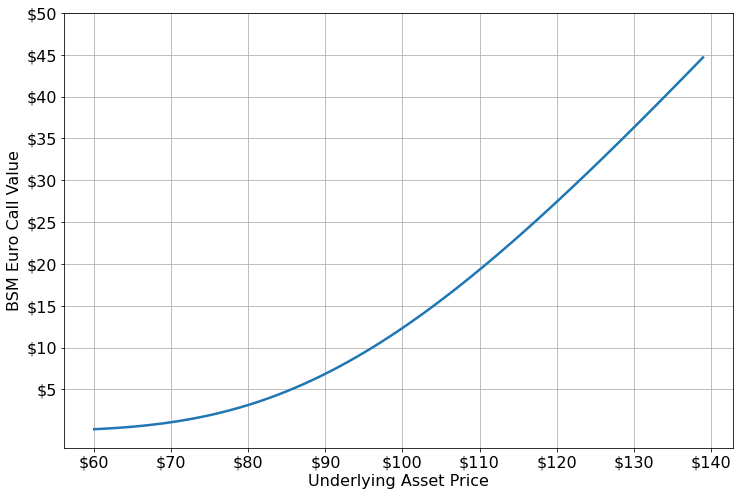

In [11]:
plt.plot(range(60,140),[black_scholes_merton(x,100,.05,1,.25)[0] for x in range(60,140)],lw=2.5)
plt.yticks(range(5,55,5),['$'+str(i) for i in range(5,55,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Underlying Asset Price')
plt.ylabel('BSM Euro Call Value')
plt.grid();

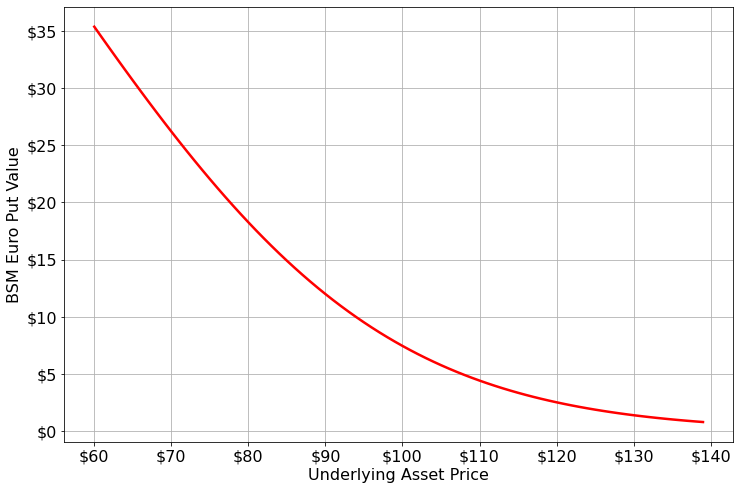

In [12]:
plt.plot(range(60,140),[black_scholes_merton(x,100,.05,1,.25)[1] for x in range(60,140)],lw=2.5,color='red')
plt.yticks(range(0,40,5),['$'+str(i) for i in range(0,40,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Underlying Asset Price')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Strike Price**

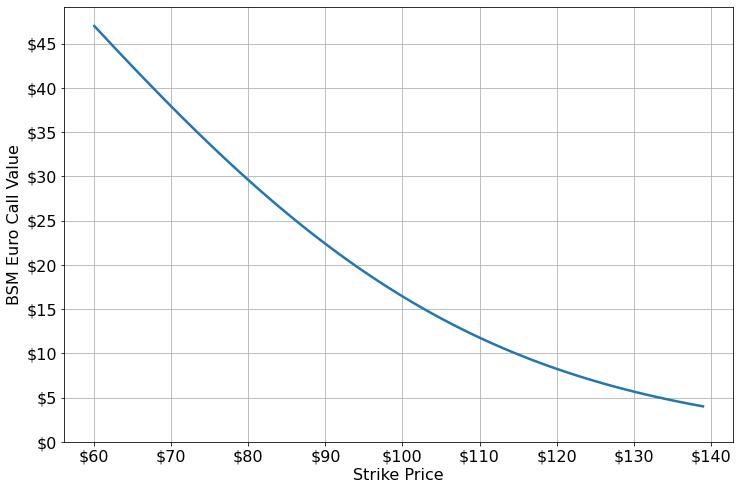

In [13]:
plt.plot(range(60,140),[black_scholes_merton(105,x,.03,1,.3)[0] for x in range(60,140)],lw=2.5)
plt.yticks(range(0,50,5),['$'+str(i) for i in range(0,50,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Strike Price')
plt.ylabel('BSM Euro Call Value')
plt.grid();

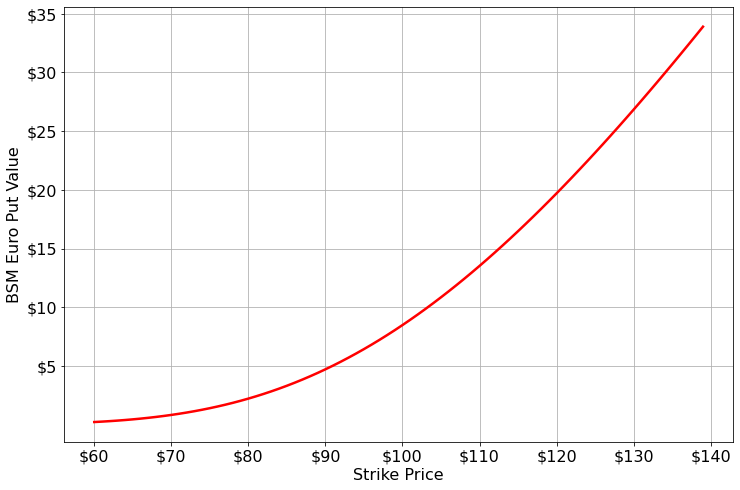

In [15]:
plt.plot(range(60,140),[black_scholes_merton(105,x,.03,1,.3)[1] for x in range(60,140)],lw=2.5, color='red')
plt.yticks(range(5,40,5),['$'+str(i) for i in range(5,40,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Strike Price')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Volatility**

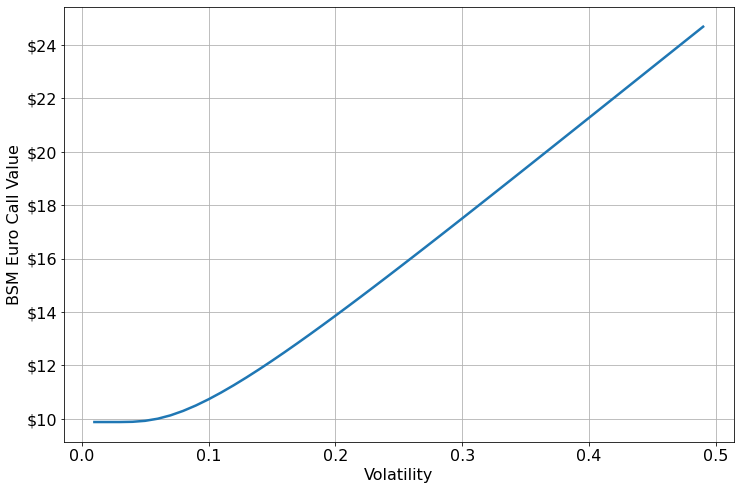

In [17]:
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[0] for x in np.arange(.01,.5,.01)],lw=2.5)
plt.yticks(range(10,26,2),['$'+str(i) for i in range(10,26,2)])
plt.xlabel('Volatility')
plt.ylabel('BSM Euro Call Value')
plt.grid();

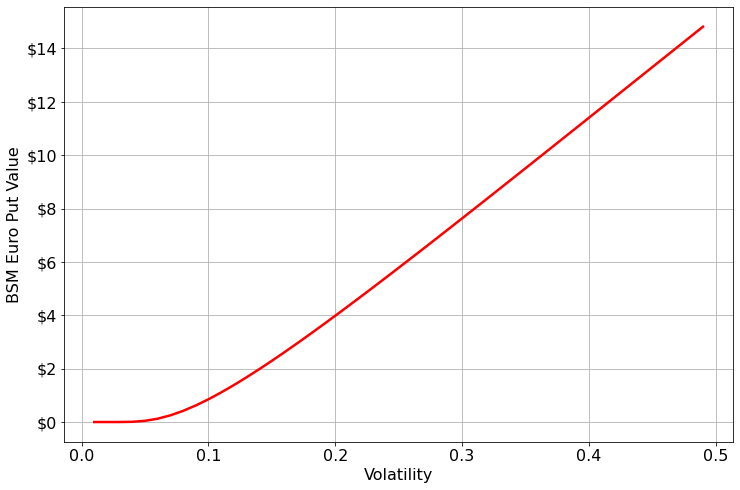

In [18]:
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[1] for x in np.arange(.01,.5,.01)],lw=2.5,color='red')
plt.yticks(range(0,16,2),['$'+str(i) for i in range(0,16,2)])
plt.xlabel('Volatility')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Time**

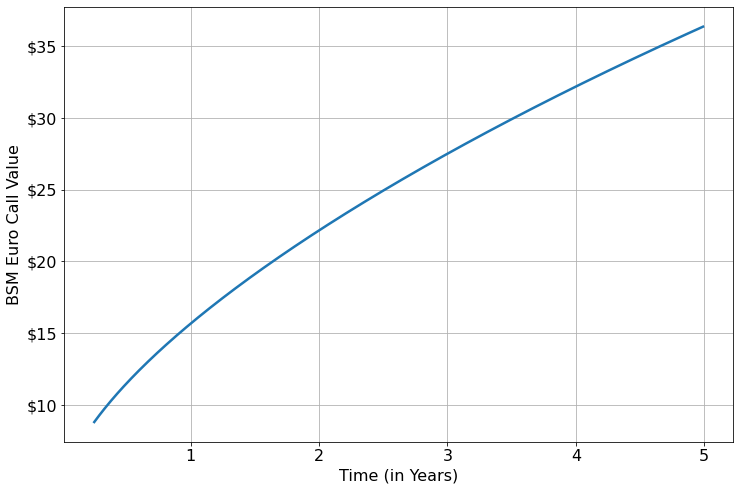

In [19]:
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[0] for x in np.arange(.25,5,.01)],lw=2.5)
plt.yticks(range(10,40,5),['$'+str(i) for i in range(10,40,5)])
plt.xlabel('Time (in Years)')
plt.ylabel('BSM Euro Call Value')
plt.grid();

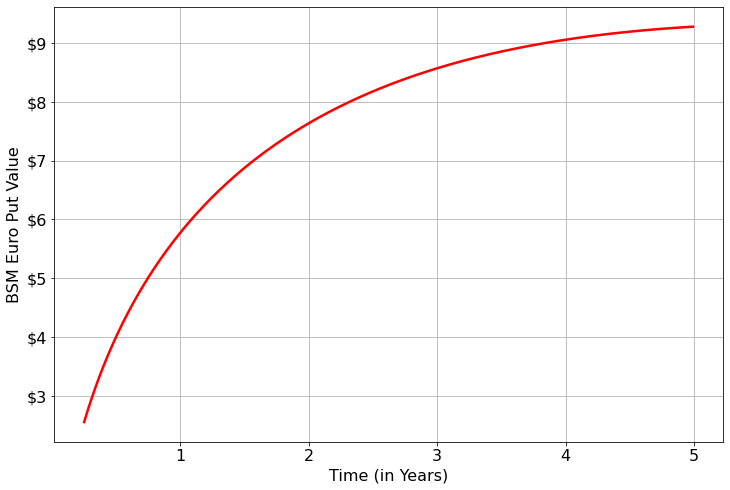

In [20]:
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[1] for x in np.arange(.25,5,.01)],lw=2.5,color='red')
plt.yticks(range(3,10,1),['$'+str(i) for i in range(3,10,1)])
plt.xlabel('Time (in Years)')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Interest Rates**

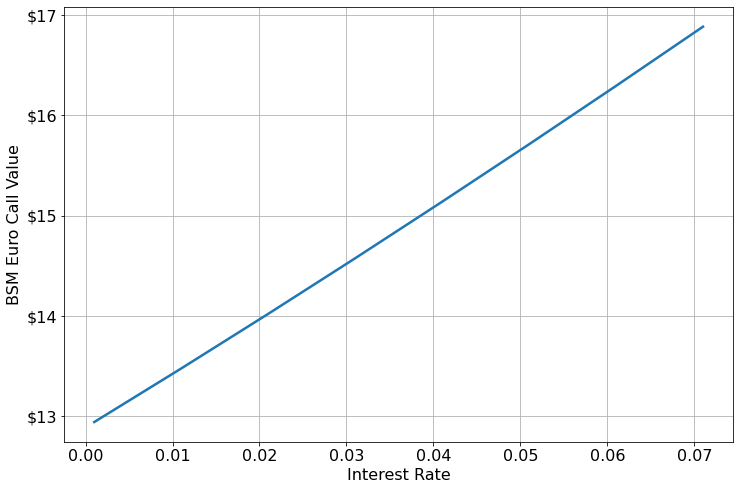

In [22]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[0] for x in np.arange(.001,.075,.01)],lw=2.5)
plt.yticks(range(13,18,1),['$'+str(i) for i in range(13,18,1)])
plt.xlabel('Interest Rate')
plt.ylabel('BSM Euro Call Value')
plt.grid();

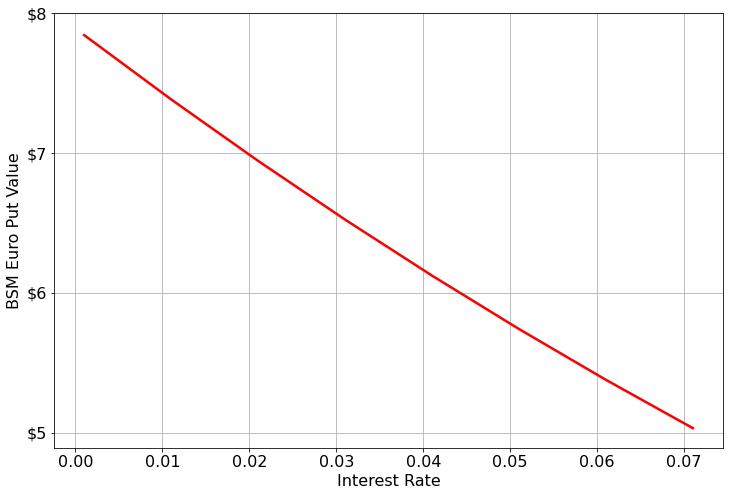

In [23]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='red')
plt.yticks(range(5,9,1),['$'+str(i) for i in range(5,9,1)])
plt.xlabel('Interest Rate')
plt.ylabel('BSM Euro Put Value')
plt.grid();

## **Dividend Yield**

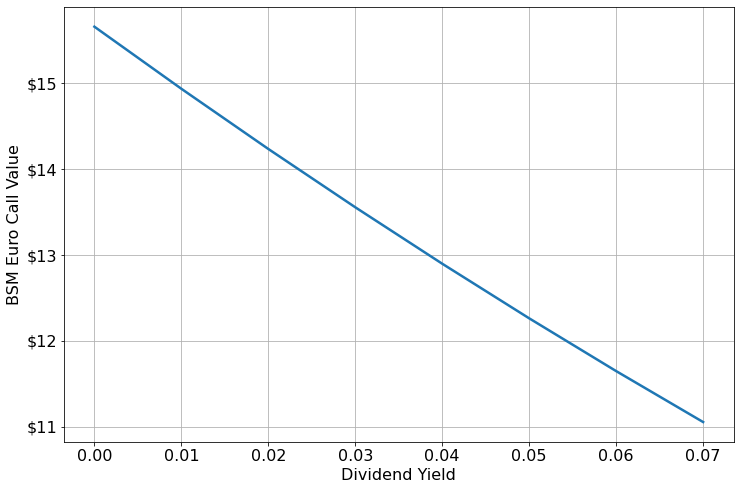

In [24]:
plt.plot(np.arange(0.0,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[0] for x in np.arange(0.0,.075,.01)],lw=2.5)
plt.yticks(range(11,16,1),['$'+str(i) for i in range(11,16,1)])
plt.xlabel('Dividend Yield')
plt.ylabel('BSM Euro Call Value')
plt.grid();

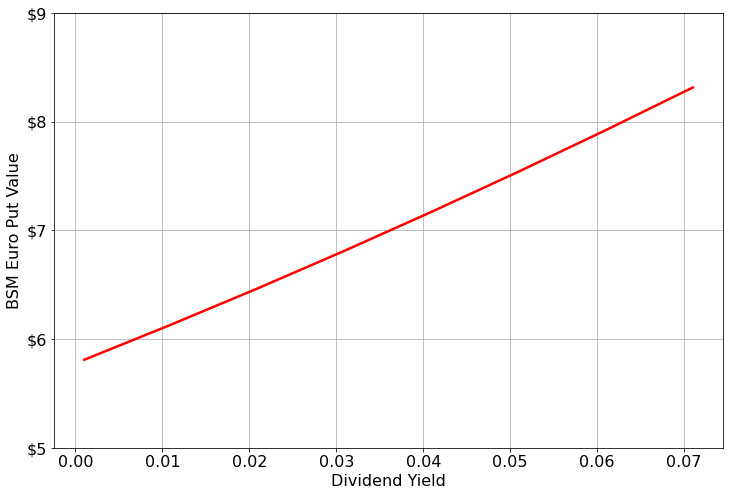

In [25]:
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='red')
plt.yticks(range(5,10,1),['$'+str(i) for i in range(5,10,1)])
plt.xlabel('Dividend Yield')
plt.ylabel('BSM Euro Put Value')
plt.grid();

# **Comparing the Black Scholes Merton Model to the live market**

In [26]:
def annualized_days(date1, date2):
  return (date2 - date1).days/365

In [28]:
apple_call, apple_put = black_scholes_merton(161.94,160,.001,annualized_days(date.today(),date(2022,2,18)),.2888,.0055)

In [29]:
print(f'Black Scholes Merton Model value for a European Apple Option Call: {apple_call:.2f}\nBlack Scholes value for a European Apple Option Put: {apple_put:.2f}')

Black Scholes Merton Model value for a European Apple Option Call: 9.90
Black Scholes value for a European Apple Option Put: 8.13


# **References and Additional Learning**

## **Calculator**

- **[Black Scholes equation](https://www.wolframalpha.com/input/?i=black-scholes+equation) from WolframAlpha**

## **Textbook**

- **[Options, Futures, and Other Derivatives, 10th Edition](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html)**

## **Videos**

- **[Black Scholes Merton option pricing model](https://www.youtube.com/watch?v=sbdba4AB5JM&ab_channel=BionicTurtle) from Bionic Turle**

## **Websites**

- **[Input parameter for Stock Price and Dividend Yield](https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch) from Yahoo! Finance**

- **[Input parameter for Implied Volatility and Time](https://finance.yahoo.com/quote/AAPL/options?date=1645142400) from Yahoo! Finance**

- **[Black-Scholes Model](https://www.investopedia.com/terms/b/blackscholes.asp) by Adam Hayes from Investopedia.com**

- **[European Option](https://www.investopedia.com/terms/e/europeanoption.asp) from Investopedia.com**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717). Happy coding!**